## Image Classification 

### Convolutional Neural Network
#### Implimentation of Transfer learning and fine tuning


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


# transfer learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# preprocess images
from tensorflow.keras.preprocessing import image


#metrics
from sklearn.metrics import confusion_matrix

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import warnings

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

In [ ]:
labels = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

###  list 10 classes
Here are the 10 classes:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [8]:
# Combine train and test labels to get the entire dataset
y_all = np.concatenate([y_train, y_test])

In [14]:
# Count the number of elements in each category
unique, counts = np.unique(y_all, return_counts=True)
class_counts = dict(zip(unique, counts))
print(unique)
print(counts)
class_counts

[0 1 2 3 4 5 6 7 8 9]
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

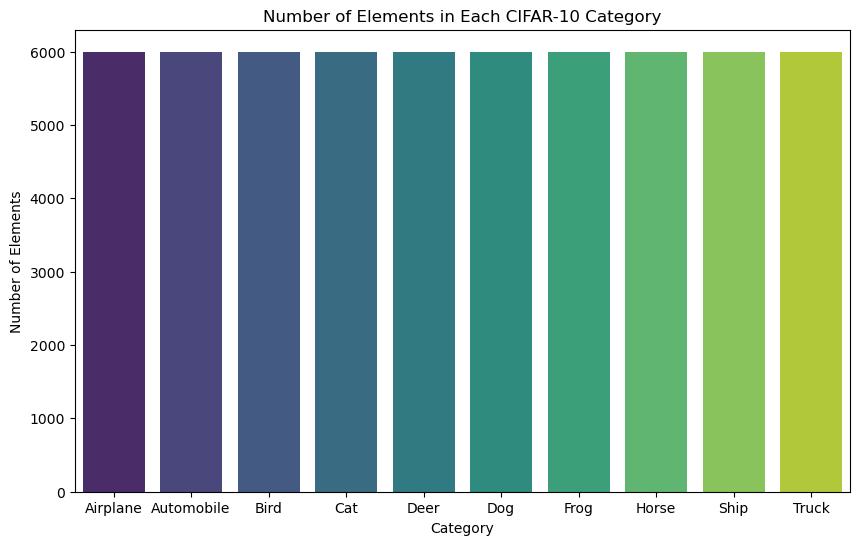

In [17]:
# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")

# Label the plot
plt.title('Number of Elements in Each CIFAR-10 Category')
plt.xlabel('Category')
plt.ylabel('Number of Elements')
plt.xticks(ticks=np.arange(10), labels=labels)

plt.show()

#### Balance Data
The data is balanced as there are 6000 accross each labels

In [19]:
# Split the Test set into test and validation set
# Split the original test set into validation and test sets (50% each)
x_val, x_test_new, y_val, y_test_new = train_test_split(x_test, y_test, test_size=0.5, random_state=42)


In [20]:
 #Display the shapes of the resulting sets ( Features and labels)
print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"New Test set: {x_test_new.shape}, {y_test_new.shape}")

Training set: (50000, 32, 32, 3), (50000, 1)
Validation set: (5000, 32, 32, 3), (5000, 1)
New Test set: (5000, 32, 32, 3), (5000, 1)


### Data Generation


In [22]:
# Create a data generator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,          # Scaling pixel values
    rotation_range=20,          # Random rotation
    width_shift_range=0.2,      # Random horizontal shift
    height_shift_range=0.2,     # Random vertical shift
    shear_range=0.2,            # Shear transformation
    zoom_range=0.2,             # Random zoom
    horizontal_flip=True,       # Random horizontal flip
    fill_mode='nearest'         # Fill in missing pixels after augmentation
)

In [23]:
# Create data generators for validation and test (only scaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [24]:
# Define batch size
batch_size = 32

In [28]:
# Creating the data generators
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = test_datagen.flow(x_val, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(x_test_new, y_test_new, batch_size=batch_size)



In [29]:
# Check the generators
print(train_generator, val_generator, test_generator)

<keras.src.preprocessing.image.NumpyArrayIterator object at 0x000002B91CDA0C70> <keras.src.preprocessing.image.NumpyArrayIterator object at 0x000002B91EB41130> <keras.src.preprocessing.image.NumpyArrayIterator object at 0x000002B91EB41BE0>


### Modelling


In [31]:
# Initialize a Sequential model
model = models.Sequential()

In [32]:
# Add the first convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and appropriate input shape
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the first pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer with 64 filters and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add the second pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers to feed into fully connected layers
model.add(layers.Flatten())

# Add a fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (one for each class) and softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))



In [33]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

### Training the model


In [34]:
# Assuming you already have the train_generator, val_generator from earlier steps

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=val_generator
)

print('***********************************************************')
print('New Model Accuracy ')
# Record the final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Final training accuracy: {train_accuracy:.4f}")


Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.7415 - accuracy: 0.1037 - val_loss: 1.3866 - val_accuracy: 0.0734
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4926 - accuracy: 0.0973 - val_loss: 1.2628 - val_accuracy: 0.0954
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3993 - accuracy: 0.0967 - val_loss: 1.1606 - val_accuracy: 0.1004
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3377 - accuracy: 0.0986 - val_loss: 1.1371 - val_accuracy: 0.0744
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.2912 - accuracy: 0.0975 - val_loss: 1.0604 - val_accuracy: 0.0966
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2630 - accuracy: 0.0977 - val_loss: 1.0852 - val_accuracy: 0.0892
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.2227 - accuracy: 0.0995 - val_loss: 1.0534 -

## Trying Different architectures (Added new layers) & other hyperparameters 

In [49]:
model.pop() # remove the output layer
model.pop() # remove the last dense layer
model.pop() # remove the flatten  layer



# Add more convolution layers before flattening
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Add input shape here
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add more convolution layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten the model after the convolutional layers
model.add(layers.Flatten())

# Increase the dense layer
model.add(layers.Dense(128, activation='relu'))

# Use Batch Normalization
model.add(layers.BatchNormalization()) #normalize the output of the convolution and can improve convergence during training.

# Add dropout to reduce overfitting
model.add(layers.Dropout(0.5))

# Add the output layer with 10 units (one for each class) and softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))



In [50]:
## Compiling the model with additional layers

In [51]:
# change the optimiza
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [52]:
# Train the model with 20 epochs
history2 = model.fit(train_generator, epochs=12, batch_size=64, validation_data=val_generator)


print('***********************************************************')
print('Fine Tuned Model Accuracy ')
# Record the final training accuracy
train_accuracy_2 = history2.history['accuracy'][-1]
print(f"Final training accuracy: {train_accuracy_2:.4f}")


Epoch 1/12
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5432 - accuracy: 0.1024 - val_loss: 1.1682 - val_accuracy: 0.1034
Epoch 2/12
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3416 - accuracy: 0.1000 - val_loss: 1.3354 - val_accuracy: 0.0596
Epoch 3/12
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3241 - accuracy: 0.1057 - val_loss: 1.1021 - val_accuracy: 0.0810
Epoch 4/12
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3614 - accuracy: 0.0989 - val_loss: 1.0978 - val_accuracy: 0.0960
Epoch 5/12
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4296 - accuracy: 0.1006 - val_loss: 1.2360 - val_accuracy: 0.0482
Epoch 6/12
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5186 - accuracy: 0.1008 - val_loss: 1.2168 - val_accuracy: 0.1298
Epoch 7/12
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6010 - accuracy: 0.0961 - val_loss: 1.2804 -

## Transfer Learning

We will use VGG16 as the base model for transfer learning. VGG16 is a well-established model known for its simplicity and effectiveness in image classification tasks. Its architecture has proven robust for various datasets, including CIFAR-10, even though it was originally trained on ImageNet, a dataset with more complex images.

The VGG16 model consists of multiple convolutional layers, followed by fully connected layers, which makes it ideal for feature extraction. By excluding the top layer (classification layer), we can adapt this model for CIFAR-10 by adding our custom classification head.

In [54]:
# Create the base model
# Load the VGG16 model with pretrained ImageNet weights, excluding the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model's layers so they aren't trained
base_model.trainable = False


58889256/58889256 [==============================] - 2s 0us/step


In [55]:
# Create the New Model
pretrained_model = models.Sequential()

# add the base to the model
pretrained_model.add(base_model)



### Building on the Pretrained Model


In [56]:
# Add a flattening layer to convert 3D feature maps to 1D feature vectors
pretrained_model.add(layers.Flatten())

# Add a dense layer for classification with 64 units and ReLU activation
pretrained_model.add(layers.Dense(64, activation='relu'))

# Add a dropout layer for regularization
pretrained_model.add(layers.Dropout(0.5))

# Add the output layer with 10 units (for CIFAR-10 classes) and softmax activation
pretrained_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
pretrained_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 14748170 (56.26 MB)
Trainable params: 33482 (130.79 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Preprocess_input in our model
The VGG16 model comes with a preprocess_input function, which normalizes the pixel values in the way that VGG16 expects based on how it was trained on ImageNet. 
This step is critical for proper transfer learning.

In [57]:
# Create data generators and apply preprocess_input for VGG16
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create the data generators
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_test_datagen.flow(x_val, y_val, batch_size=32)
test_generator = val_test_datagen.flow(x_test_new, y_test_new, batch_size=32)

### Train the Pretrained Model

In [58]:
# Train the model using the train and validation data generators
pretrain_history = pretrained_model.fit(
    train_generator,
    epochs=10,  # You can experiment with more epochs
    validation_data=val_generator
)


print('***********************************************************')
print('Pretrained Model Accuracy ')
# Record the final training accuracy
pretrain_accuracy = pretrain_history.history['accuracy'][-1]
print(f"Final training accuracy: {pretrain_accuracy:.4f}")

Epoch 1/10
1563/1563 [==============================] - 261s 166ms/step - loss: 2.5155 - accuracy: 0.0505 - val_loss: 1.5331 - val_accuracy: 0.0834
Epoch 2/10
1563/1563 [==============================] - 294s 188ms/step - loss: 1.7977 - accuracy: 0.0685 - val_loss: 1.3769 - val_accuracy: 0.0828
Epoch 3/10
1563/1563 [==============================] - 268s 171ms/step - loss: 1.6744 - accuracy: 0.0755 - val_loss: 1.2948 - val_accuracy: 0.0814
Epoch 4/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.6048 - accuracy: 0.0740 - val_loss: 1.2015 - val_accuracy: 0.0906
Epoch 5/10
1563/1563 [==============================] - 306s 195ms/step - loss: 1.5687 - accuracy: 0.0848 - val_loss: 1.1971 - val_accuracy: 0.0796
Epoch 6/10
1563/1563 [==============================] - 311s 199ms/step - loss: 1.5330 - accuracy: 0.0877 - val_loss: 1.2325 - val_accuracy: 0.0984
Epoch 7/10
1563/1563 [==============================] - 301s 192ms/step - loss: 1.5164 - accuracy: 0.0857 - val_

### Experimenting with different architecture and freezing some layer


In [64]:
#Freeze some layers (Freeze all except the last two layers
for layer in base_model.layers[:-2]:
    layer.trainable = False

# remove the output layer and other layers unit it gets to the flatten layer
pretrained_model.pop()
#pretrained_model.pop()
#pretrained_model.pop()


# Add a dense layer for classification with 64 units and ReLU activation
pretrained_model.add(layers.Dense(64, activation='relu'))


# Add new top layers
pretrained_model.add(layers.Dense(256, activation='relu'))  

# Add a flattening layer to convert 3D feature maps to 1D feature vectors
pretrained_model.add(layers.Flatten())

pretrained_model.add(layers.Dropout(0.5))  # Optionally add dropout for regularization
pretrained_model.add(layers.Dense(10, activation='softmax'))  # Output layer remains the same


pretrained_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [65]:
finetune_history = pretrained_model.fit(train_generator, epochs=15, validation_data=val_generator)

print('***********************************************************')
print('Finetuned Pretrained Model Accuracy ')
# Record the final training accuracy
finetuned_pretrain_accuracy = finetune_history.history['accuracy'][-1]
print(f"Final training accuracy: {finetuned_pretrain_accuracy:.4f}")

Epoch 1/15
1563/1563 [==============================] - 378s 241ms/step - loss: 6.9046 - accuracy: 0.1252 - val_loss: 2.3099 - val_accuracy: 0.0000e+00
Epoch 2/15
1563/1563 [==============================] - 421s 269ms/step - loss: 1.9820 - accuracy: 0.1282 - val_loss: 2.3244 - val_accuracy: 0.0000e+00
Epoch 3/15
1563/1563 [==============================] - 402s 257ms/step - loss: 1.9548 - accuracy: 0.1315 - val_loss: 2.3428 - val_accuracy: 0.0000e+00
Epoch 4/15
1563/1563 [==============================] - 415s 266ms/step - loss: 1.9187 - accuracy: 0.1230 - val_loss: 2.3615 - val_accuracy: 0.0000e+00
Epoch 5/15
1563/1563 [==============================] - 394s 252ms/step - loss: 1.9059 - accuracy: 0.1250 - val_loss: 2.3775 - val_accuracy: 0.0000e+00
Epoch 6/15
1563/1563 [==============================] - 433s 277ms/step - loss: 1.8937 - accuracy: 0.1248 - val_loss: 2.3887 - val_accuracy: 0.0000e+00
Epoch 7/15
1563/1563 [==============================] - 426s 272ms/step - loss: 1.8902 -

# Conclusion

In [66]:
print('********************* Different Model Accuracies *********************\n\n')
print('Non Pretrained CNN Model Accuracy ')

our_cnn_train_accuracy = history.history['accuracy'][-1]
our_cnn_val_accuracy = history.history['val_accuracy'][-1]
print(f"Our CNN training accuracy: {our_cnn_train_accuracy:.4f}")
print(f"Our CNN validation accuracy: {our_cnn_val_accuracy:.4f}")


print('***********************************************************\n\n')
print('Fine Tuned CNN Model Accuracy ')

our_finetuned_cnn_train_accuracy = history2.history['accuracy'][-1]
our_finetuned_cnn_val_accuracy = history2.history['val_accuracy'][-1]
print(f"Our Finetuned CNN training accuracy: {our_finetuned_cnn_train_accuracy:.4f}")
print(f"Our Finetuned CNN validation accuracy: {our_finetuned_cnn_val_accuracy:.4f}")



print('***********************************************************\n\n')
print('Base Model (VGG16)  Model Accuracy ')
# Record the final training accuracy
basemodel_train_accuracy = pretrain_history.history['accuracy'][-1]
basemodel_val_accuracy = pretrain_history.history['val_accuracy'][-1]
print(f"Final Base Model training  accuracy: {basemodel_train_accuracy:.4f}")
print(f"Final Base Model validation accuracy: {basemodel_val_accuracy:.4f}")



print('***********************************************************\n\n')
print('Base Model (VGG16) with fine tuning Model Accuracy ')
# Record the final training accuracy
finetune_basemodel_train_accuracy = finetune_history.history['accuracy'][-1]
finetune_basemodel_val_accuracy = finetune_history.history['val_accuracy'][-1]
print(f"Final Base Model training  accuracy: {finetune_basemodel_train_accuracy:.4f}")
print(f"Final Base Model validation accuracy: {finetune_basemodel_val_accuracy:.4f}")

********************* Different Model Accuracies *********************


Non Pretrained CNN Model Accuracy 
Our CNN training accuracy: 0.0979
Our CNN validation accuracy: 0.0900
***********************************************************


Fine Tuned CNN Model Accuracy 
Our Finetuned CNN training accuracy: 0.1016
Our Finetuned CNN validation accuracy: 0.0938
***********************************************************


Base Model (VGG16)  Model Accuracy 
Final Base Model training  accuracy: 0.0872
Final Base Model validation accuracy: 0.0908
***********************************************************


Base Model (VGG16) with fine tuning Model Accuracy 
Final Base Model training  accuracy: 0.1064
Final Base Model validation accuracy: 0.0000


## The Validation and Testing Predictions



In [67]:

# Get the testing data and labels
test_images, test_labels = next(iter(test_generator))  # or use your validation dataset directly

# Predict the classes
test_predictions_cnn = model.predict(test_images)
test_predicted_classes_cnn = np.argmax(test_predictions_cnn, axis=1)

1/1 [==============================] - 0s 382ms/step


In [68]:
# Confusion Matrix

# Get the validation data and labels
val_images, val_labels = next(iter(val_generator))  # or use your validation dataset directly

# Predict the classes
predictions_cnn = model.predict(val_images)
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)


1/1 [==============================] - 0s 35ms/step


### Our Best CNN Model Confusion Matrix on Validation set


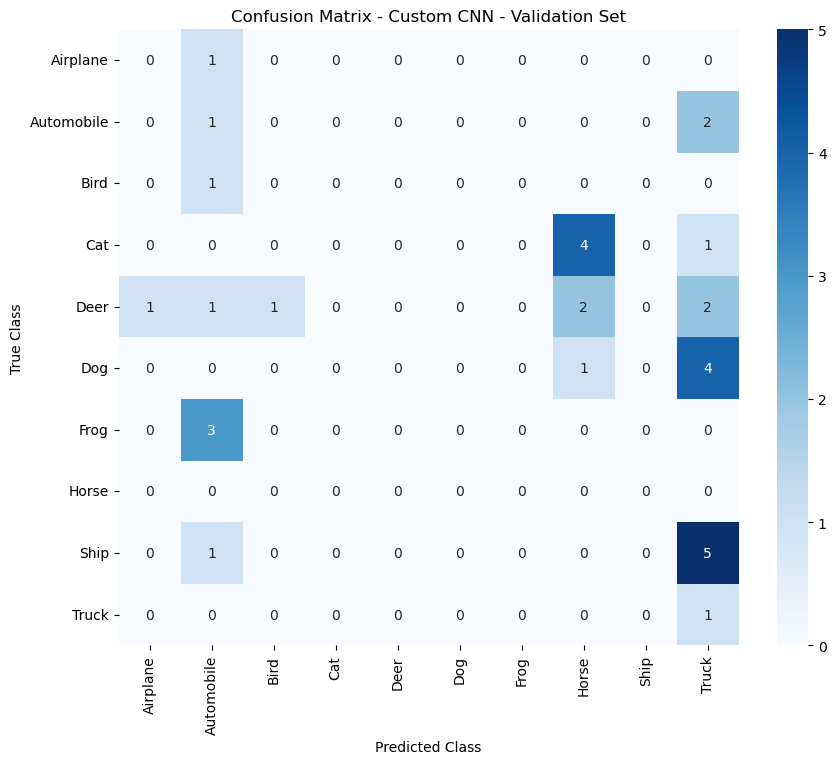

In [71]:

# Confusion matrix for our CNN with heightest accuracy
val_conf_matrix_cnn = confusion_matrix(val_labels, predicted_classes_cnn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(val_conf_matrix_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Custom CNN - Validation Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [72]:
# Model accuracy on validation set
val_cnn_accuracy = model.evaluate(test_generator)
print("Our best CNN Model accuracy on Validation set: ",  val_cnn_accuracy)


157/157 [==============================] - 2s 11ms/step - loss: 2524.7146 - accuracy: 0.0518
Our best CNN Model accuracy on Validation set:  [2524.714599609375, 0.05180000141263008]


### Our Best CNN Model Confusion Matrix on Testing set


In [73]:

# Confusion matrix for our CNN with heightest accuracy
'''test_conf_matrix_cnn = confusion_matrix(test_labels, test_predicted_classes_cnn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Custom CNN - Testing Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()'''

'test_conf_matrix_cnn = confusion_matrix(test_labels, test_predicted_classes_cnn)\n\n# Plot confusion matrix\nplt.figure(figsize=(10, 8))\nsns.heatmap(test_conf_matrix_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)\nplt.title("Confusion Matrix - Custom CNN - Testing Set")\nplt.xlabel("Predicted Class")\nplt.ylabel("True Class")\nplt.show()'

In [74]:
# Model accuracy on validation set
'''test_cnn_accuracy =
print("Our best CNN Model accuracy on Testing set : ",  test_cnn_accuracy)'''

'test_cnn_accuracy =\nprint("Our best CNN Model accuracy on Testing set : ",  test_cnn_accuracy)'

### Best Pretrained Model Confusion Matrix on Validation set

1/1 [==============================] - 0s 139ms/step


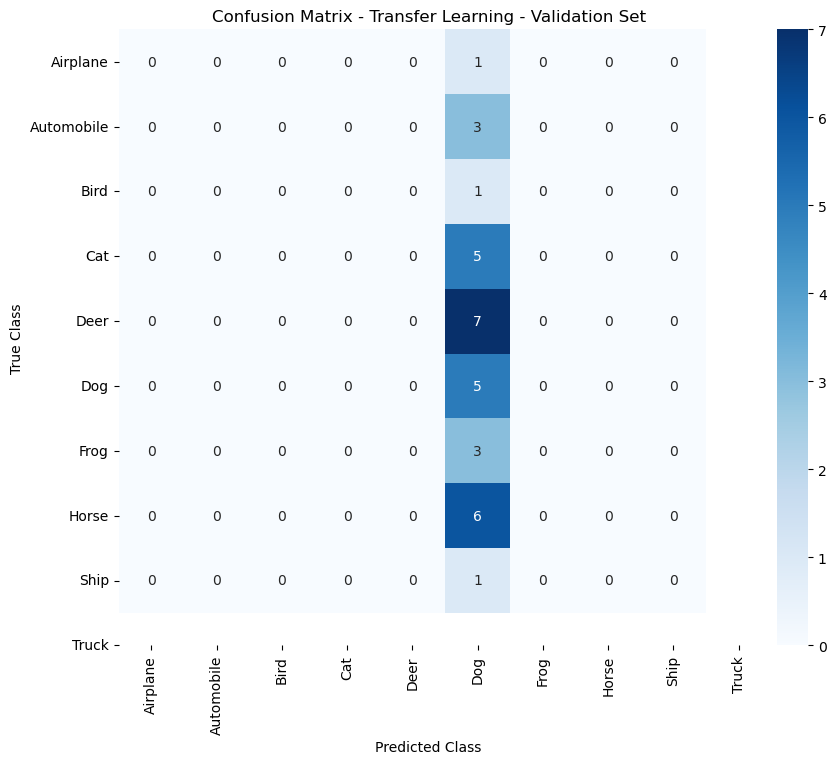

In [75]:
# Predict the classes for the validation set
predictions_transfer = pretrained_model.predict(val_images)
predicted_classes_transfer = np.argmax(predictions_transfer, axis=1)

# Confusion matrix
conf_matrix_transfer = confusion_matrix(val_labels, predicted_classes_transfer)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_transfer, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Transfer Learning - Validation Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [77]:
# Model accuracy on validation set
val_pretrained_cnn_accuracy = pretrained_model.evaluate(val_generator)
print("Our best Pre Trained Model accuracy on Validation set : ",  val_pretrained_cnn_accuracy)

157/157 [==============================] - 5s 28ms/step - loss: 2.4785 - accuracy: 0.0000e+00
Our best Pre Trained Model accuracy on Validation set :  [2.478471517562866, 0.0]


### Best Pretrained Model Confusion Matrix on Testing set

In [ ]:
# Predict the classes for the validation set
'''test_predictions_transfer = pretrained_model.predict(test_images)
test_predicted_classes_transfer = np.argmax(test_predictions_transfer, axis=1)

# Confusion matrix
test_conf_matrix_transfer = confusion_matrix(test_labels, test_predicted_classes_transfer)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix_transfer, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Transfer Learning - Testing Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()'''

# Observation and Decision

Observations on the accuracies and comparing the two model (our CNN and pretrained CNN) selecting the best model based on the model with the highest accuracy


157/157 [==============================] - 5s 29ms/step - loss: 2.4721 - accuracy: 0.0000e+00
Testing Accuracy For Best Model: 0.0000
1/1 [==============================] - 0s 40ms/step


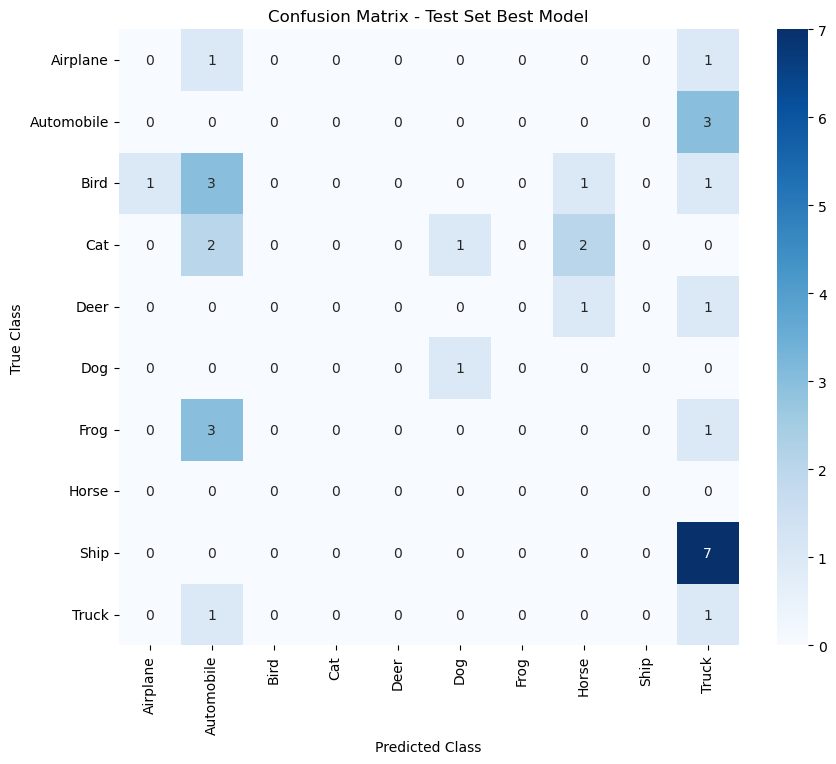

In [79]:
# Testing the best model (assuming transfer learning is the best model)
test_loss, test_accuracy = pretrained_model.evaluate(test_generator)
print(f"Testing Accuracy For Best Model: {test_accuracy:.4f}")

# Confusion matrix for test set
test_images, test_labels = next(iter(test_generator))  # or your test dataset directly
predictions_test = model.predict(test_images)
predicted_classes_test = np.argmax(predictions_test, axis=1)

conf_matrix_test = confusion_matrix(test_labels, predicted_classes_test)

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Test Set Best Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Use the model to make predictions on at least three other images from one of the 10 classes.


1/1 [==============================] - 0s 22ms/step
Predictions for images  1  is  Dog
1/1 [==============================] - 0s 23ms/step
Predictions for images  2  is  Dog
1/1 [==============================] - 0s 33ms/step
Predictions for images  3  is  Dog


[5, 5, 5]

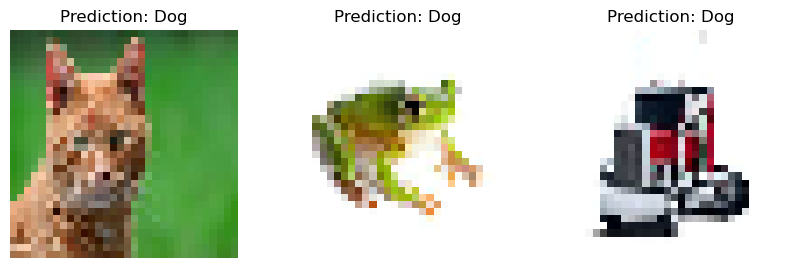

In [90]:
# Function to preprocess and make predictions on new images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0  # Scale image
    return np.expand_dims(img_array, axis=0), img  # return the preporcessed and original

# Paths to your new images (replace with actual paths)
image_paths = ['image1.jpeg', 'image2.jpeg', 'image3.jpeg']

plt.figure(figsize=(10, 5))  # Set up plot size

# Make predictions
predictions = []
i=0
for img_path in image_paths:
    i=i+1
    img, original_img = load_and_preprocess_image(img_path)
                                                 
    # Display image
    plt.subplot(1, len(image_paths), i)  # Adjust the subplot parameters according to the number of images
    plt.imshow(original_img)
    plt.title(f"Prediction: {labels[predicted_class]}")
    plt.axis('off')  # Hide axes
    
    pred = pretrained_model.predict(img)
    predicted_class = np.argmax(pred)
    print('Predictions for images ', i, ' is ', labels[predicted_class] )
    predictions.append(predicted_class)

predictions  # This will output the predicted classes for the images



### Report
The Model Preformance is not very accurate as the accuracy is quite low for both the CNN and the PreTrained model as the predictions were not accurate. 